In [7]:
import random as rd
import numpy as np

polarizationFilters = ["t", "x"]
draftKeySize = 10
binary = [0, 1]
draftKey = [rd.choice(binary) for i in range(draftKeySize)]
aliceFilters = [rd.choice(polarizationFilters) for j in range(draftKeySize)]
bobFilters = [rd.choice(polarizationFilters) for k in range(draftKeySize)]

print("Draft key: ", draftKey)
print("Alice's Filters: ", aliceFilters)
print("Bob's Filters: ", bobFilters)

Draft key:  [1, 1, 1, 1, 1, 1, 0, 0, 0, 1]
Alice's Filters:  ['t', 't', 'x', 'x', 't', 'x', 't', 'x', 'x', 't']
Bob's Filters:  ['x', 't', 'x', 'x', 't', 'x', 't', 'x', 't', 'x']


In [8]:
transmittion = []

def send():
    
    for i in range(draftKeySize):
        if draftKey[i] == 1 and aliceFilters[i] == "t":
            transmittion.append([0,1])
        elif draftKey[i] == 1 and aliceFilters[i] == "x":
            transmittion.append([1,1])
        elif draftKey[i] == 0 and aliceFilters[i] == "t":
            transmittion.append([1,0])
        elif draftKey[i] == 0 and aliceFilters[i] == "x":
            transmittion.append([-1,1])
        
    print("Photons transmitted by polarization: ")
    print(transmittion)
    
send()

Photons transmitted by polarization: 
[[0, 1], [0, 1], [1, 1], [1, 1], [0, 1], [1, 1], [1, 0], [-1, 1], [-1, 1], [0, 1]]


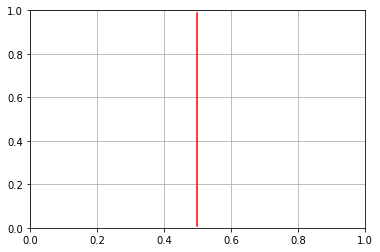

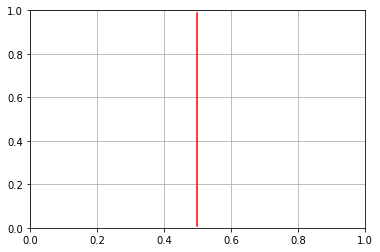

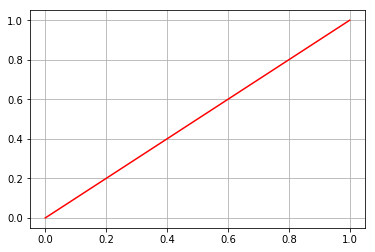

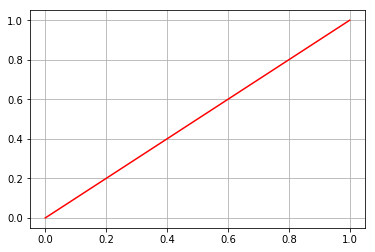

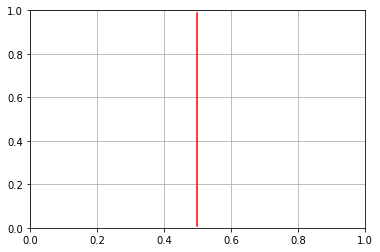

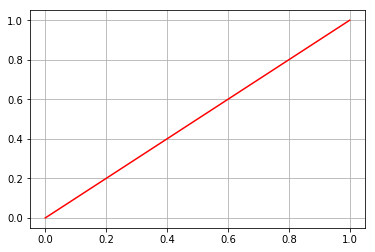

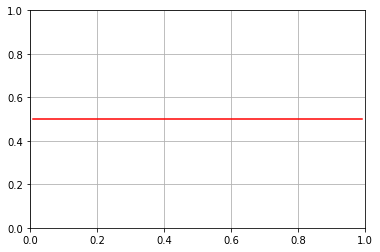

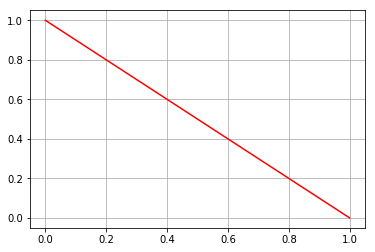

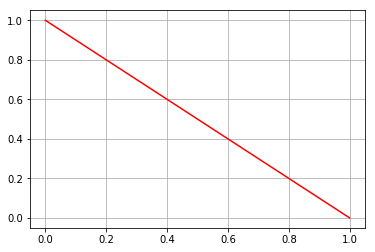

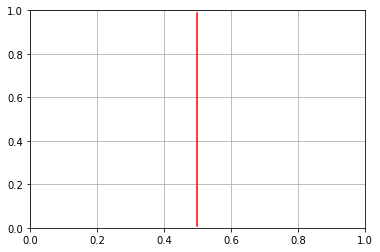

In [9]:
import matplotlib.pyplot as plt

def displaySend():

    for i in range(draftKeySize):
        if transmittion[i] == [0,1]:
            plt.axvline(x=0.5, ymin=0.01, ymax=0.99, color='r')
            plt.grid()
            plt.show()
        elif transmittion[i] == [1,1]:
            x1 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
            y1 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
            plt.plot(x1, y1, color='r')
            plt.grid()
            plt.show()
        elif transmittion[i] == [1,0]:
            plt.axhline(y=0.5, xmin=0.01, xmax=0.99, color='r')
            plt.grid()
            plt.show()
        elif transmittion[i] == [-1,1]:
            x2 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
            y2 = list(reversed(x2))
            plt.plot(x2, y2, color='r')
            plt.grid()
            plt.show()

displaySend()

In [10]:
receivedKey = []

def receive():
    
    for i in range(draftKeySize):
        if transmittion[i] == [0,1] and bobFilters[i] == "t":
            receivedKey.append(1)
        elif transmittion[i] == [0,1] and bobFilters[i] == "x":
            receivedKey.append("DISCARD")
        elif transmittion[i] == [1,1] and bobFilters[i] == "t":
            receivedKey.append("DISCARD")
        elif transmittion[i] == [1,1] and bobFilters[i] == "x":
            receivedKey.append(1)
        elif transmittion[i] == [1,0] and bobFilters[i] == "t":
            receivedKey.append(0)
        elif transmittion[i] == [1,0] and bobFilters[i] == "x":
            receivedKey.append("DISCARD")
        elif transmittion[i] == [-1,1] and bobFilters[i] == "t":
            receivedKey.append("DISCARD")
        elif transmittion[i] == [-1,1] and bobFilters[i] == "x":
            receivedKey.append(0)
    
    print("Received Key: ")
    print(receivedKey)
    
receive()        

Received Key: 
['DISCARD', 1, 1, 1, 1, 1, 0, 0, 'DISCARD', 'DISCARD']


In [11]:
agreedKey = []

def keyAgreement():

    for i in range(draftKeySize):
        if receivedKey[i] == 1 or receivedKey[i] == 0:
            agreedKey.append(receivedKey[i])
            
    print("Agreed upon key: ")
    print(agreedKey)

keyAgreement()

Agreed upon key: 
[1, 1, 1, 1, 1, 0, 0]
